In [1]:
import pandas as pd
import datetime as dt
from pandas_datareader import data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
positions_df = pd.read_csv("portfolio.csv")
positions_df

,stock,qty,price,current_prices,P&L
0,AAPL,15,126.67,146.92,304
1,TSLA,18,711.11,774.39,1139
2,SPY,10,300.00,443.91,1439


# Correlation

In [3]:
def correlation(positions_df):

    #Yahoo finance
    tickers = positions_df['stock'].tolist()
    start_date = '2019-01-01'
    end_date = '2021-11-04'
    panel_data = data.DataReader(tickers,'yahoo', start_date, end_date)
    panel_data= panel_data['Close']
    ret_series= (panel_data.pct_change()+1).cumprod()-1
    corr = ret_series.corr()
    #print(corr)
    
    #Graph
    fig, ax = plt.subplots(figsize=(16,10))
    sns.heatmap(corr, annot = True, ax = ax, cmap="YlGnBu")
    
    #Calcualte no of stock that are correlated 
    check = "passed"
    length = len(tickers) #no of tickers
    new = [] # list of correlation
    for each in corr:
        row = corr[each]
        new.extend(row.tolist())
    total = len(new)-length # total no of pairs
    count = 0 #correlation >0.8
    for i in new:
        if(i >= 0.8):
            count+=1
    count = count-length
    if count/total>=0.5:
        check= "failed"
        print("More than 50% of the stock that are highly positively correlated")
    else:
        print("Less than 50% of your stock that are highly positively correlated")
    return check

More than 50% of the stock that are highly positively correlated


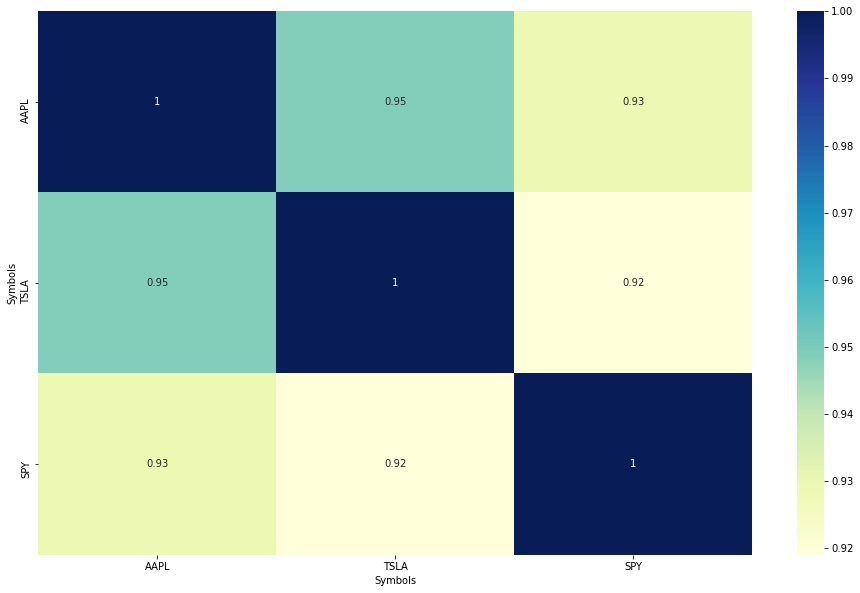

In [4]:
a=correlation(positions_df)

In [5]:
print(a)

failed


# Asset distribution

In [6]:
def asset_distribution(positions_df):
    user_input = int(input("Enter percentage threshold of asset (in %):"))
    user_input = user_input/100 
    total_assets = positions_df['qty']*positions_df['current_prices'] 
    assets = positions_df['stock'].tolist()
    total = sum(total_assets) #total amount of assets
    assets_percentage = []
    # get the distribution of each asset
    for asset in total_assets:
        assets_percentage.append(asset/total)
    # get asset which over the threshold
    asset_overthreshold = []
    asset_overthreshold_percentage = []
    for i in range(len(assets)):
        if assets_percentage[i] >= user_input:
            asset_overthreshold.append(assets[i])
            asset_overthreshold_percentage.append(assets_percentage[i])
    # show result
    check = "passed"
    if len(asset_overthreshold)>0:
        check="failed"
        print("Asset distribution is over the threshold")
        for n in range(len(asset_overthreshold)):
            percentage = asset_overthreshold_percentage[n]*100
            print("{}: {:.1f}%".format(asset_overthreshold[n],percentage))
    else:
        print("Asset distribution is below the threshold")
    return check
    

In [7]:
b = asset_distribution(positions_df)

Enter percentage threshold of asset (in %):20
Asset distribution is over the threshold
TSLA: 67.7%
SPY: 21.6%


In [8]:
print(b)

failed
